# MatSE 410 Ternary pycalphad examples

**pycalphad** is a free and open source software written in Python for performing thermodynamic calculations within the CALculation of PHAse Diagrams (CALPHAD) method.


This guide was contributed to by

- Shuang Lin (2024)
- Brandon Bocklund (2019, 2020)



### Databases

Any calculation in pycalphad requires you to define:

* A Database
* The components to consider
* The phases to consider
* The conditions of the calculation

CALPHAD database files are made by researchers who model the Gibbs energy functions. The parameters (Gibbs energy functions) in the databases are stored in the Thermo-Calc DataBase (TDB) format. Files are usually saved with the file extension `.tdb`. These files are read by pycalphad by importing the `Database` class and running the following

```python
from pycalphad import Database
db = Database("path/to/database.tdb")
```

Many database files have been indexed at the [TDBDB](https://avdwgroup.engin.brown.edu), which can be used to search for TDB files. Many binary and ternary systems have been evaluated, some more than once as new data or calculations are published.

The databases required for these examples are included here.

## Ternary systems

### `ternplot`

Previously we plotted binary phase diagrams with pycalphad's `binplot` function. Here we will use the `ternplot` function as imported above.




### Al-Cu-Y

Here we will use the ternplot API to plot an isothermal section of the Al-Cu-Y system from the thermodynamic database found at the NIST CALPHAD assessments assessed by Zhang et al. Calphad 35 (2011).

In [1]:
from pycalphad import Database, equilibrium, ternplot, variables as v



#### Isotherm at T=830 K

We'll calculate an isotherm using `equilibrium` calculations at T=830 and `ternplot` to plot the phase diagrams with respect to mole fractions and chemical potentials

CPU times: user 31.1 s, sys: 42.1 s, total: 1min 13s
Wall time: 26.4 s


<TriangularAxes: title={'center': 'Al-Cu-Y'}, xlabel='X(AL)', ylabel='X(Y)'>

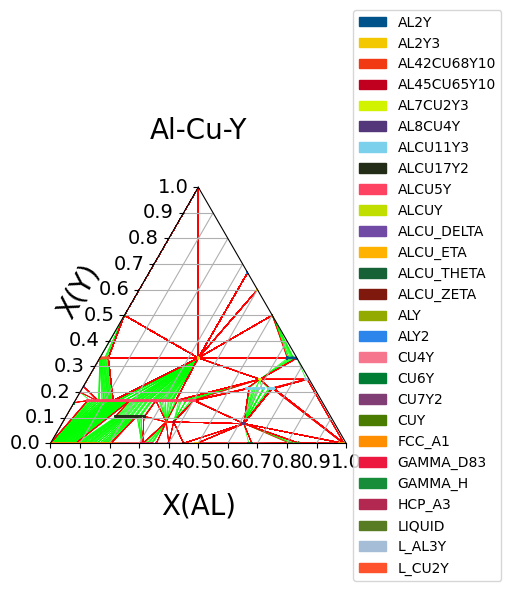

In [2]:
%matplotlib inline
from pycalphad import Database, ternplot
from pycalphad import variables as v

db_al_cu_y = Database('ALCUY.tdb')
comps = ['AL', 'CU', 'Y', 'VA']
phases = list(db_al_cu_y.phases.keys())
conds = {v.T: 830, v.P:101325, v.X('AL'): (0,1,0.015), v.X('Y'): (0,1,0.015)}

%time ternplot(db_al_cu_y, comps, phases, conds, x=v.X('AL'), y=v.X('Y'))

## Triangular projection
Importing the pycalphad.plot.triangular module automatically registers a 'triangular' projection in matplotlib for you to use in custom plots, such as liquidus projections or contour plots of custom property models.

Here we will use pycalphad to calculate the mixing enthalpy of the FCC phase in our Al-Cu-Y system. Then we will the triangular projection to plot the calculated points as a colored scatterplot on the triangular axes.

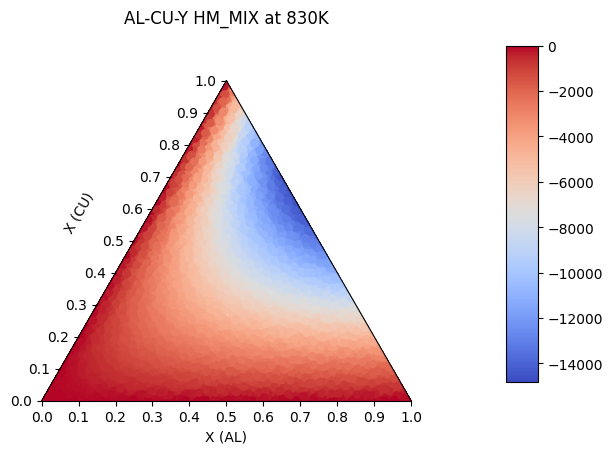

In [9]:
import matplotlib.pyplot as plt
from pycalphad.plot import triangular
from pycalphad import calculate

# some sample data, these could be from an equilibrium calculation or a property model.
# here we are calculating the mixing enthlapy of the FCC_A1 phase at 830K.
c = calculate(db_al_cu_y, comps, 'FCC_A1', output='HM_MIX', T=830, P=101325, pdens=5000)

# Here we are getting the values from our plot.
xs = c.X.values[0, 0, 0, :, 0]  # 1D array of Al compositions
ys = c.X.values[0, 0, 0, :, 1]  # 1D array of Cu compositions
zs = c.HM_MIX.values[0, 0, 0, :]  # 1D array of mixing enthalpies at these compositions

# when we imported the pycalphad.plot.triangular module, it made the 'triangular' projection available for us to use.
fig = plt.figure()
ax = fig.add_subplot(projection='triangular')
ax.scatter(xs, ys, c=zs,
           cmap='coolwarm',
           linewidth=0.0)

# label the figure
ax.set_xlabel('X (AL)')
ax.set_ylabel('X (CU)')
ax.yaxis.label.set_rotation(60)  # rotate ylabel
ax.yaxis.set_label_coords(x=0.12, y=0.5)  # move the label to a pleasing position
ax.set_title('AL-CU-Y HM_MIX at 830K')


cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7]) # x, y, width, height
cm = plt.cm.ScalarMappable(cmap='coolwarm')
cm.set_array(zs)
fig.colorbar(cm, cax=cbar_ax)